In [1]:
# HHL figure defaults 
# updated December 2024
import numpy as np
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import protfasta
from sparrow import Protein
from scipy.stats import mannwhitneyu
from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.25

# set default plot line width
matplotlib.rcParams['lines.linewidth'] = 0.5

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
matplotlib.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
matplotlib.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
matplotlib.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
matplotlib.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis

# reduce padding
matplotlib.rcParams['xtick.major.pad'] = 1
matplotlib.rcParams['ytick.major.pad'] = 1


# **Set font sizes for ticks, labels, and legend**
matplotlib.rcParams['xtick.labelsize'] = 8  # Font size for x-tick labels
matplotlib.rcParams['ytick.labelsize'] = 8  # Font size for y-tick labels
matplotlib.rcParams['axes.labelsize'] = 10  # Font size for x-axis and y-	axis labels
matplotlib.rcParams['legend.fontsize'] = 8  # Font size for legend text

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from matplotlib.colors import ListedColormap


In [2]:
from sparrow import Protein

In [3]:
with open('data_with_avg_and_std.csv','r') as fh:
    content = fh.readlines()

In [14]:
def seq2vector(s):
    v = []
    for i in s:
        if i in ['E','D']:
            v.append(1)
        elif i in ['R','K']:
            v.append(2)
        elif i in ['F','Y','W']:
            v.append(3)
        elif i in ['A','L','V','I','M']:
            v.append(4)
        elif i in ['P']:
            v.append(5)
        else:
            v.append(0)
    return v

def seq2vector2(s):
    v = []
    for i in s:
        if i in ['E','D']:
            v.append(1)
        elif i in ['R','K']:
            v.append(2)
        elif i in ['F','Y','W']:
            v.append(3)
        else: 
            v.append(0)
    return v






In [5]:
id2data = {}
for line in content[1:]:
    sline = line.strip().split(',')
    id2data[sline[0]] = [sline[1], float(sline[2]), float(sline[3])]
    
id2data = dict(sorted(id2data.items(), key=lambda item: item[1][1], reverse=True))    

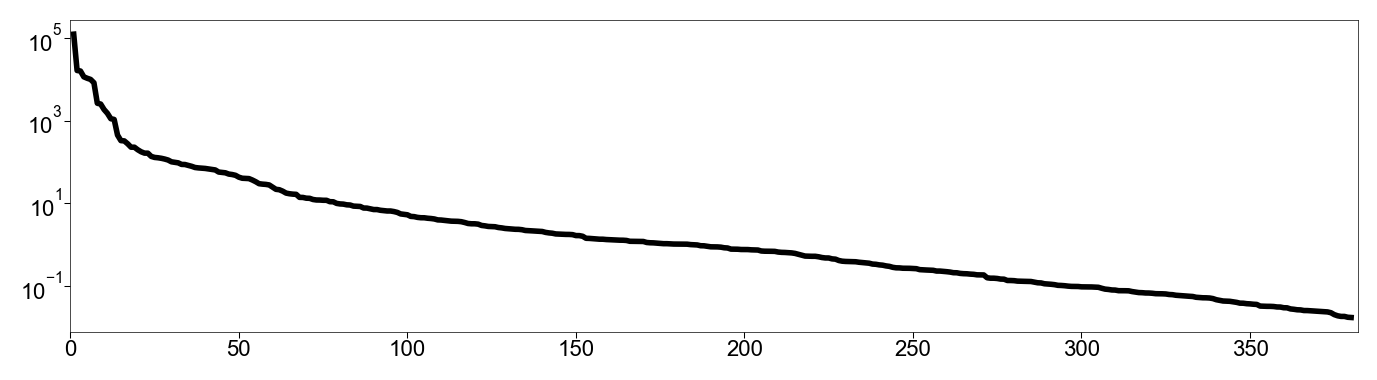

In [45]:
plt.figure(figsize=(7,2))
idx = np.arange(1,len(all_vals)+1)
plt.plot(idx, all_vals, color='k', lw=2)
plt.xlim([0,len(all_vals)+2])
plt.yscale('log')
plt.tight_layout()
plt.savefig('affinity_bars.pdf')


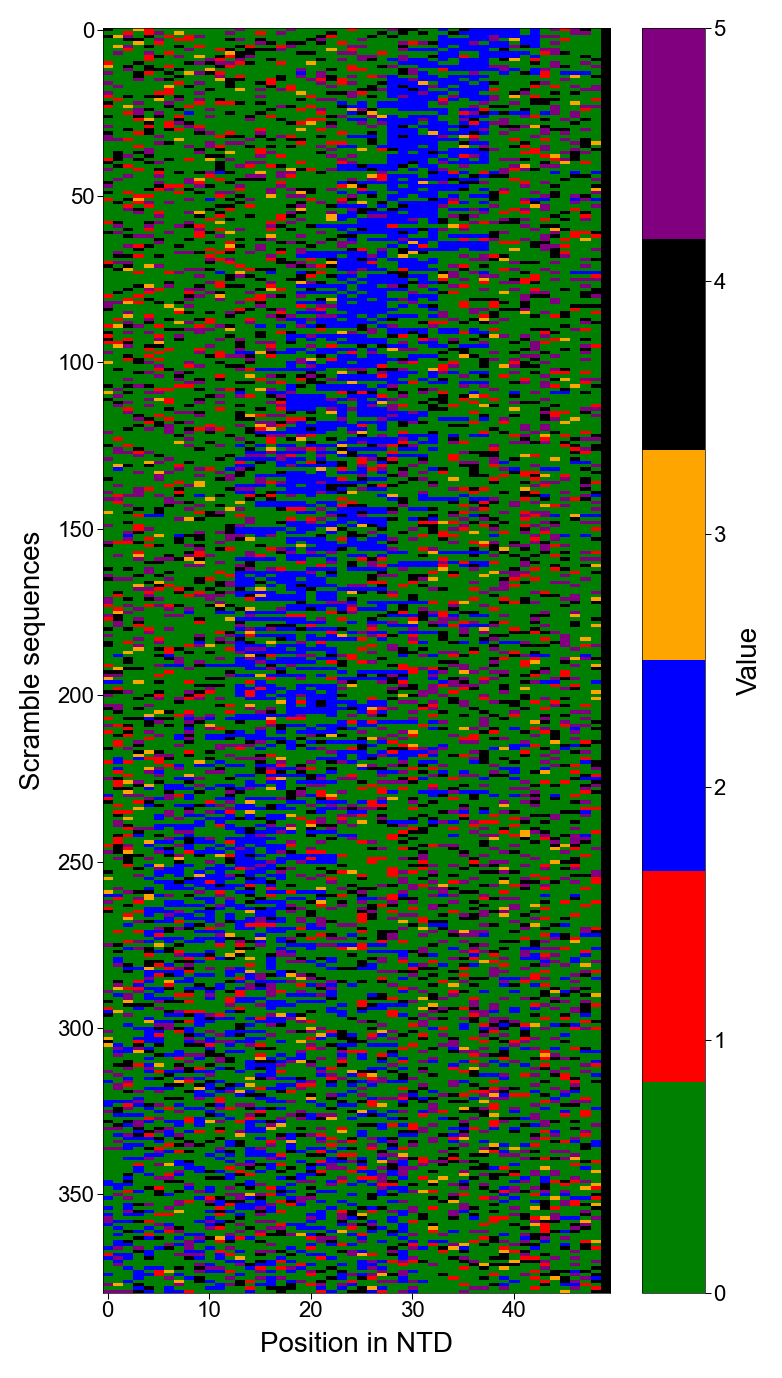

In [54]:
matrix = []
all_vals = []
for k in id2data:
    matrix.append(seq2vector(id2data[k][0]))
    all_vals.append(id2data[k][1])
cmap = ListedColormap(['green', 'red', 'blue', 'orange', 'black', 'purple'])    

plt.figure(figsize=(4, 7))
plt.imshow(matrix, cmap=cmap, aspect='auto',interpolation='none')
plt.colorbar(ticks=range(6), label='Value')  # Optional, shows what value each color maps to
plt.xlabel("Position in NTD")
plt.ylabel("Scramble sequences")
plt.tight_layout()
plt.savefig('matrix_1.png')

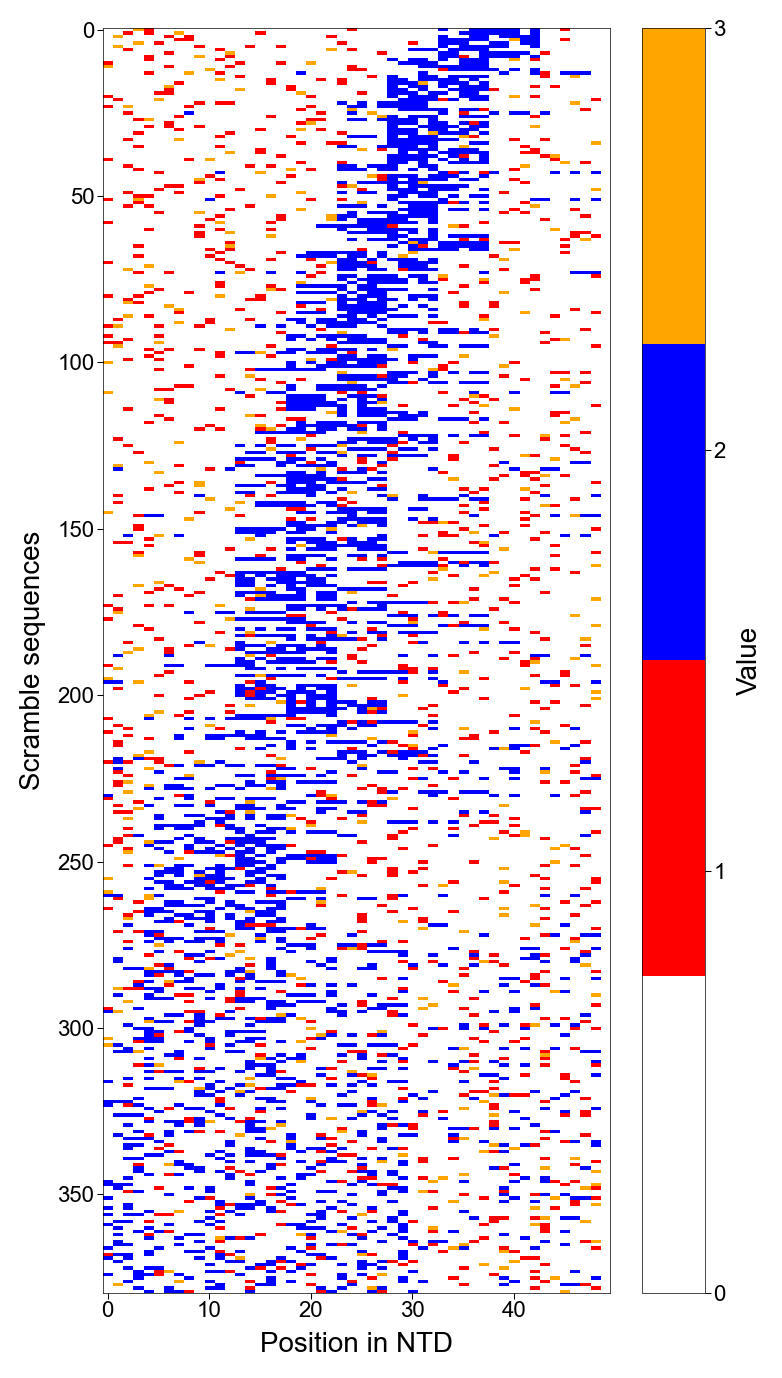

In [57]:
matrix2 = []
for k in id2data:
    matrix2.append(seq2vector2(id2data[k][0]))
cmap2 = ListedColormap(['white', 'red', 'blue', 'orange'])

plt.figure(figsize=(4, 7))
plt.imshow(matrix2, cmap=cmap2, aspect='auto',interpolation='none')
plt.colorbar(ticks=range(6), label='Value')  # Optional, shows what value each color maps to
plt.xlabel("Position in NTD")
plt.ylabel("Scramble sequences")
plt.tight_layout()
plt.savefig('matrix_2.png', dpi=850)
